Testing notebook to run my code in

In [15]:
#import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing as pre
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.model_selection import cross_val_score
df = pd.read_csv('terrorismp3.csv')
target = 'affiliation'
df.head()


,name,age,date,where,region,affiliation,role,incrimination,circumstances,method,offenses,terrorist
0,Fu'ad Abed,26,1/2/2023,Jenin,Judea-Samaria,Hamas,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF demolishing the house of a te...,Fire,1,1
1,Muhammad Khushiyeh,22,1/2/2023,Jenin,Judea-Samaria,al-Aqsa's Martyrs Brigades,Militant,Official martyrdom poster. pictures with rifles,Clashes with IDF demolishing the house of a te...,Fire,1,1
2,Adam Ayyad,15,1/3/2023,Dheisheh,Judea-Samaria,PFLP,Militant,Official martyrdom poster. his personal will. ...,Clashes with IDF forces making arrests in the ...,Fire,1,1
3,Amer Abu Zaytun,16,1/5/2023,Nablus,Judea-Samaria,al-Aqsa's Martyrs Brigades,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF forces making arrests in the ...,Fire,1,1
4,Abd al-Hadi Fakhri Youssef Nazzal,18,1/12/2023,Jenin,Judea-Samaria,PIJ,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF forces making arrests in the ...,Fire,1,1


Discovering the similarities of terrorists between casualties.

Terrorist affiliation is not always known at the time of death, see if model groups terrorists by their affiliation.

Will the model be able to group terrorists by their affiliation?

What is similarities that casualties share based off the details of their death that can't be seen initially?

Which variables are necessary to group terrorists by their affiliation?

The purpose of this module is also to explore multiple forms of clustering from two different packages:
-Scipy Hierarchachal clustering 
-Scikit learn K-means clustering 

In [13]:
df.head()

,name,age,date,where,region,affiliation,role,incrimination,circumstances,method,offenses,terrorist
0,Fu'ad Abed,26,1/2/2023,Jenin,Judea-Samaria,Hamas,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF demolishing the house of a te...,Fire,1,1
1,Muhammad Khushiyeh,22,1/2/2023,Jenin,Judea-Samaria,al-Aqsa's Martyrs Brigades,Militant,Official martyrdom poster. pictures with rifles,Clashes with IDF demolishing the house of a te...,Fire,1,1
2,Adam Ayyad,15,1/3/2023,Dheisheh,Judea-Samaria,PFLP,Militant,Official martyrdom poster. his personal will. ...,Clashes with IDF forces making arrests in the ...,Fire,1,1
3,Amer Abu Zaytun,16,1/5/2023,Nablus,Judea-Samaria,al-Aqsa's Martyrs Brigades,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF forces making arrests in the ...,Fire,1,1
4,Abd al-Hadi Fakhri Youssef Nazzal,18,1/12/2023,Jenin,Judea-Samaria,PIJ,Militant,Official martyrdom poster. pictures with rifle...,Clashes with IDF forces making arrests in the ...,Fire,1,1


In [ ]:
#would I have to convert the offenses to a string?
#Each value in the offsenses column is an assumtion of how many offenses the casualty committed in his/her lifetime based off their incrimination and circumstances of death.
#df['offenses'] = df['offenses'].astype(str)


In [12]:
# need to create dummy binary variables so that model can interpret values 
#need to scale numerical data 0-1
#create object to represent categorical features in dataset
categorical_variables = [i for i in df.select_dtypes(include = object) if i != target and i != 'name' and i != 'incrimination' and i != 'circumstances' and i != 'date' and i != 'where']
categorical_variables.append('offenses')
categorical_variables.append('terrorist')
categorical_variables

['region', 'role', 'method', 'offenses', 'terrorist']

In [28]:
dummy_variables = pd.get_dummies(df[categorical_variables], drop_first = True, dtype = 'int64')
dummy_variables

,offenses,terrorist,region_Israel,region_Judea-Samaria,region_Syria,role_Militant,role_Military Engineer,role_Officer,role_Operative,role_Secretary,role_Senior dentist,role_Senior official,role_Terrorist associate,role_Terrorist family,method_Failed PL Attack,method_Fire,method_Injury
0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
79,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
81,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
numerical_variables = [i for i in df.select_dtypes(exclude = object) if i != 'terrorist' and i != 'offenses']
numerical_variables


['age']

In [32]:
df['affiliation'].value_counts()

affiliation
PIJ                           33
Unaffiliated                  16
Unknown                       10
PFLP                           8
al-Aqsa's Martyrs Brigades     6
Hamas                          5
Fatah                          2
Al-Mujahideen Brigades         2
Multiple                       1
Name: count, dtype: int64

In [30]:
scaled_numerical_variables = [i for i in numerical_variables]

#min max scaler only accepts type array not series 

array = df[numerical_variables].values

datascaler = pre.MinMaxScaler(feature_range = (0,1))

dfscaled = pd.DataFrame(datascaler.fit_transform(array), columns = scaled_numerical_variables)
dfscaled 

,age
0,0.379310
1,0.310345
2,0.189655
3,0.206897
4,0.241379
...,...
78,0.689655
79,0.258621
80,0.655172
81,0.810345


In [31]:
modeldf = pd.concat([dummy_variables, dfscaled], axis = 1)
modeldf.head()

,offenses,terrorist,region_Israel,region_Judea-Samaria,region_Syria,role_Militant,role_Military Engineer,role_Officer,role_Operative,role_Secretary,role_Senior dentist,role_Senior official,role_Terrorist associate,role_Terrorist family,method_Failed PL Attack,method_Fire,method_Injury,age
0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.379310
1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.310345
2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.189655
3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.206897
4,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0.241379


Creating a dendrogram to vizualize the clusters from scipy's pre-built hierarchachal clustering algorithm.

Scipy uses Ward's method for cluster analysis  

https://online.stat.psu.edu/stat505/lesson/14/14.7#:~:text=This%20is%20an%20alternative%20approach,involves%20an%20agglomerative%20clustering%20algorithm.

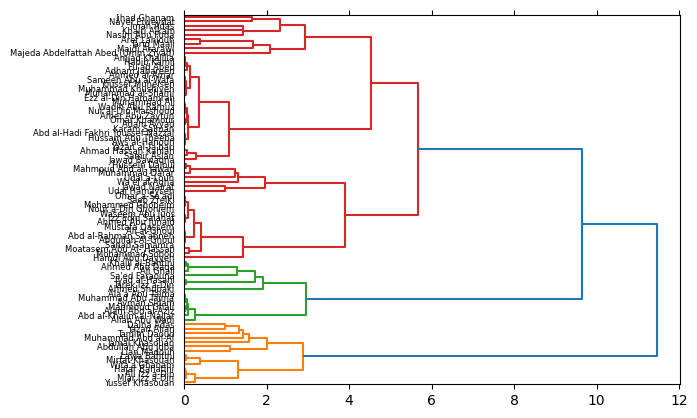

In [48]:
import scipy 
from scipy.cluster.hierarchy import dendrogram, ward 

matrices = ward(modeldf.values)
matrix = dendrogram(matrices, orientation = 'right', labels = list(df['name']))
plt.tick_params(axis = 'x', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')
plt.show()

The dendrogram displays that Scipy's hierarchachal clustering model was able to group the data into 3 seperate cluusters (corresponding with the 3 different colors red, green, orange). 

Interestingly, the 3 clusters created by the model correspond with the 3 operations the IDF executed resulting in the death of the casualties despite excluding date from the data. 

Remember that this dataset was consolidated from three tables into one if we refer back to the introduction section.

In the context of hierachachal clustering there is no need for the name of the casualty nor the date of their death.

fitting data to model

In [34]:
# lets set k to 8
# affiliations = 9, lets take out unaffiliated, 9-1 = 8
k = 8
model = KMeans(n_clusters = k, random_state = 0)
model.fit(modeldf)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=0)

In [35]:
clusters = model.predict(modeldf)
clusters

array([0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 3, 0, 3, 6, 0, 0, 0, 0, 0, 0, 6, 5,
       5, 5, 5, 5, 4, 4, 3, 4, 4, 4, 2, 1, 7, 2, 3, 4, 2, 2, 7, 2, 2, 2,
       2, 2, 7, 1, 1, 1, 2, 7, 2, 3, 7, 1, 1, 7, 1, 4, 7], dtype=int32)

In [38]:
df['clusters'] = clusters
df[df['clusters'] == 6]

,name,age,date,where,region,affiliation,role,incrimination,circumstances,method,offenses,terrorist,clusters
19,Tariq Maali,42,1/21/2023,Ramallah,Judea-Samaria,PIJ,Operative,Official martyrdom poster. footage of the inci...,Attempted stabbing attack in Sade Ephraim farm,Fire,1,1,6
20,Aref Lahlouh,20,1/25/2023,Qalqilya,Judea-Samaria,Hamas,Operative,Official martyrdom poster. footage of the inci...,Attempted stabbing attack near Kedumim,Fire,1,1,6
24,Majeda Abdelfattah Abed (Umm Ziyad),61,1/26/2023,Jenin,Judea-Samaria,Unknown,NaN,Not found,Killed during clashes with IDF arresting PIJ s...,Fire,0,0,6
35,Nasim Abu Fuda,26,1/30/2023,Kfar Tapuach,Judea-Samaria,Unknown,Terrorist associate,IDF spokesperson,Overran an IDF checkpoint. running over an Isr...,Fire,1,1,6
42,Majdi Ararawi,17,7/3/2023,Jenin,Judea-Samaria,PIJ,Military Engineer,Picture and Martyrdom poster,Clashes with IDF Forces,Fire,1,1,6


In [ ]:
fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix, orientation="right", labels= list(maindf['restaurant_name']));
plt.tick_params(axis = 'x', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')
plt.tight_layout()